In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the datasets (replace with your actual file paths after downloading)
customers = pd.read_csv("data/Customers.csv")
products = pd.read_csv("data/Products.csv")
transactions = pd.read_csv("data/Transactions.csv")

In [28]:
# Display basic information about each dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [31]:
# Display the first few rows of each dataset
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [32]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [33]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [34]:
# Check for missing values in the 'customers' dataset
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [35]:
# Convert 'SignupDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [36]:
# Remove duplicate rows in 'transactions'
transactions.drop_duplicates(inplace=True)

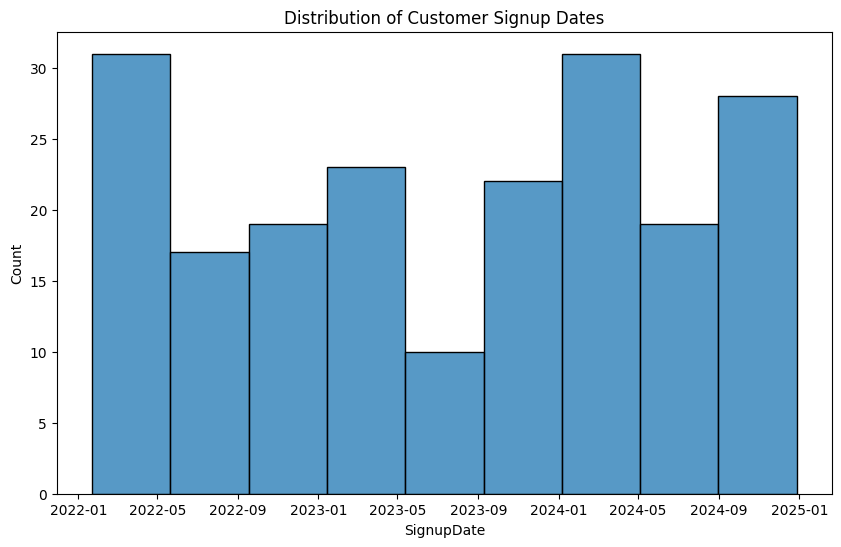

In [37]:
# Histogram of customer signup dates
plt.figure(figsize=(10, 6))
sns.histplot(customers['SignupDate'])
plt.title('Distribution of Customer Signup Dates')
plt.show()

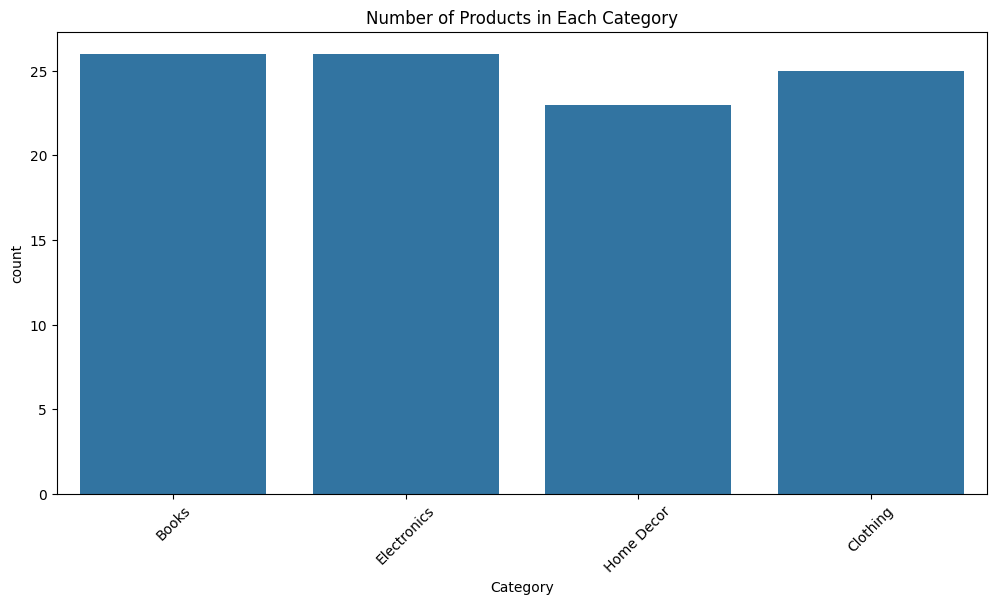

In [38]:
# Bar plot of product categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=products)
plt.title('Number of Products in Each Category')
plt.xticks(rotation=45)
plt.show()

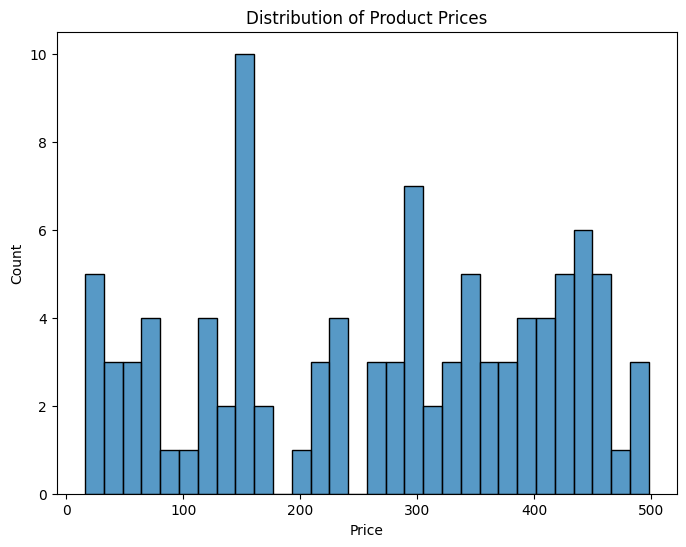

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=False, bins=30)
plt.title('Distribution of Product Prices')
plt.show()

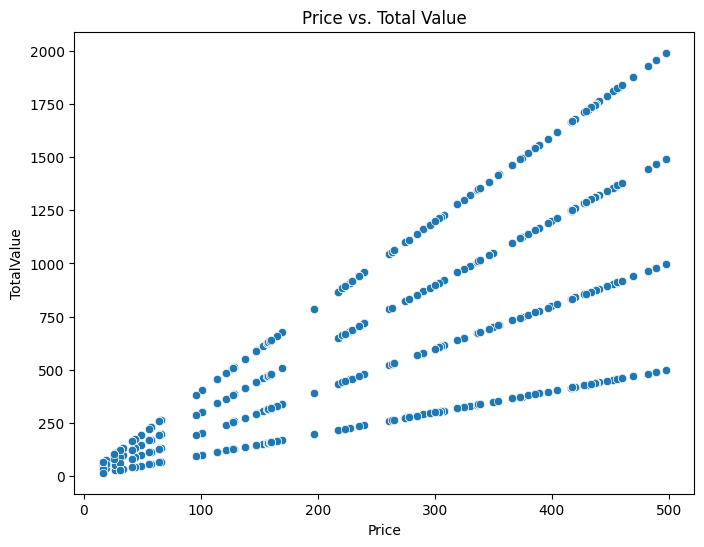

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='TotalValue', data=transactions)
plt.title('Price vs. Total Value')
plt.show()

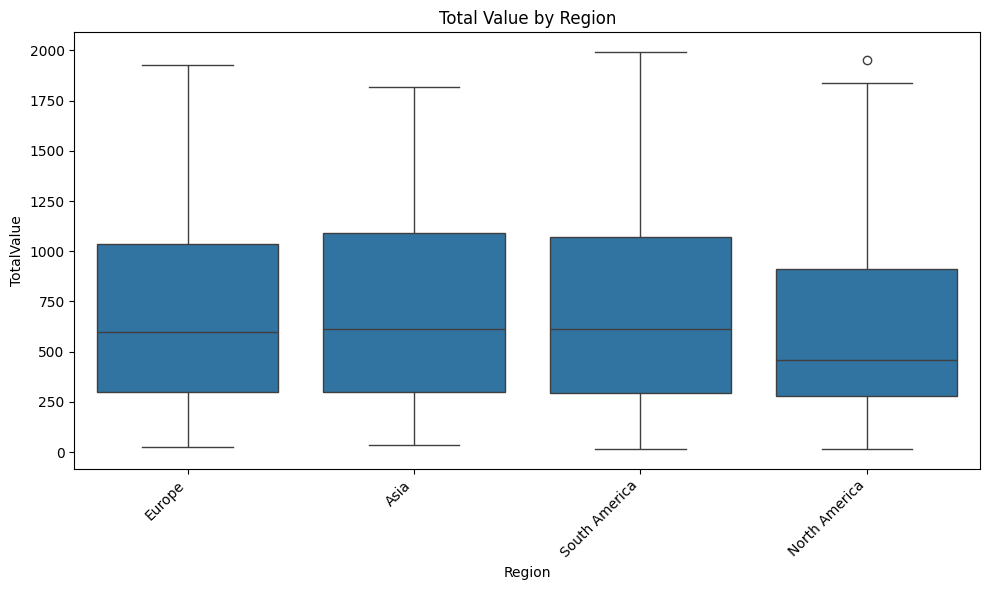

In [41]:
# Merge transactions and customers to get Region
merged_data = pd.merge(transactions, customers, on='CustomerID')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title('Total Value by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

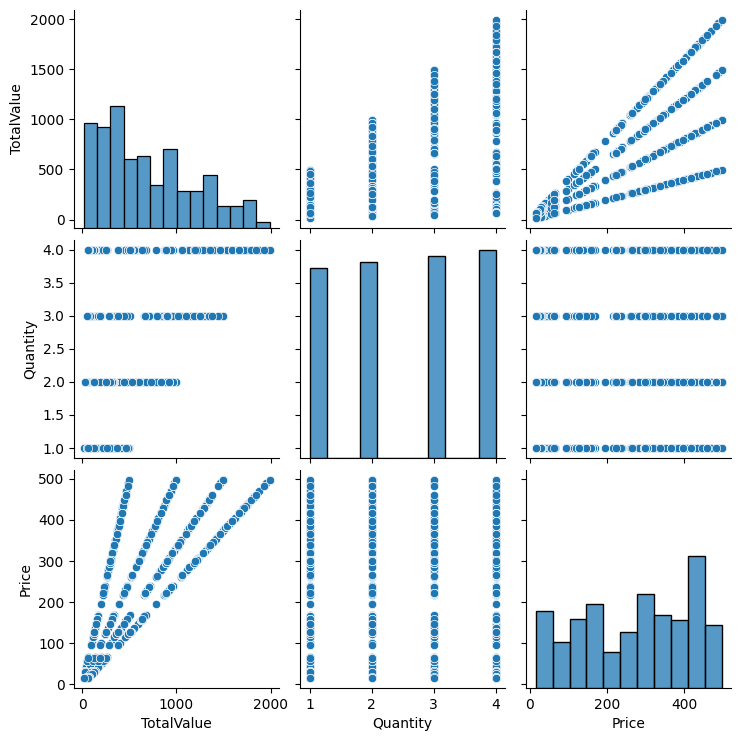

In [42]:
sns.pairplot(merged_data[['TotalValue', 'Quantity', 'Price']])
plt.show()

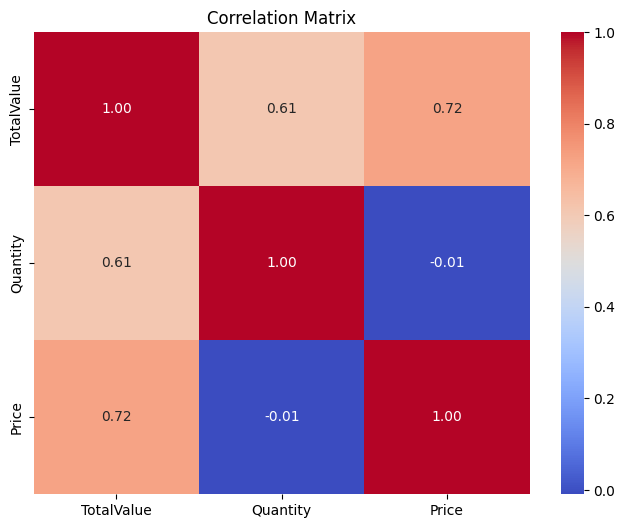

In [43]:
# Correlation matrix only works with numerical columns
merged_data = pd.merge(transactions, customers, on='CustomerID')
corr = merged_data[['TotalValue', 'Quantity', 'Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

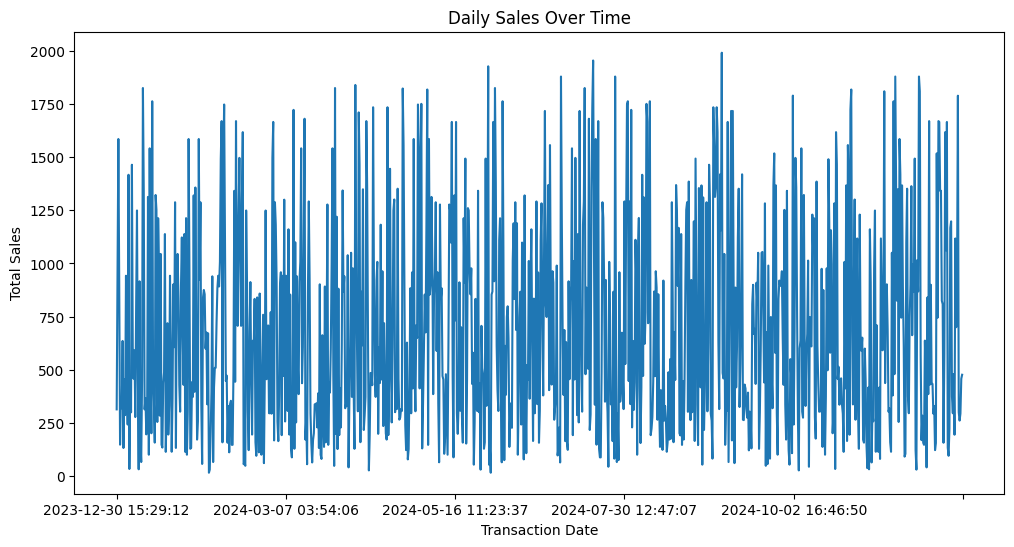

In [44]:
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.show()

# Business Insights

## Customer Insights

### Regions with most customers

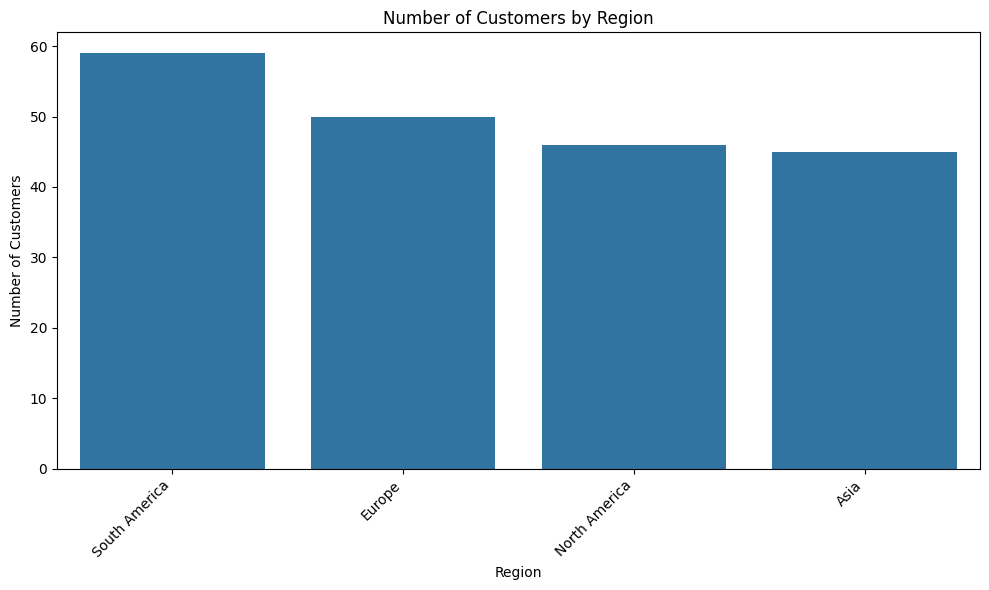

In [45]:
# Count the number of customers in each region
region_counts = customers['Region'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

### Customer growth trend

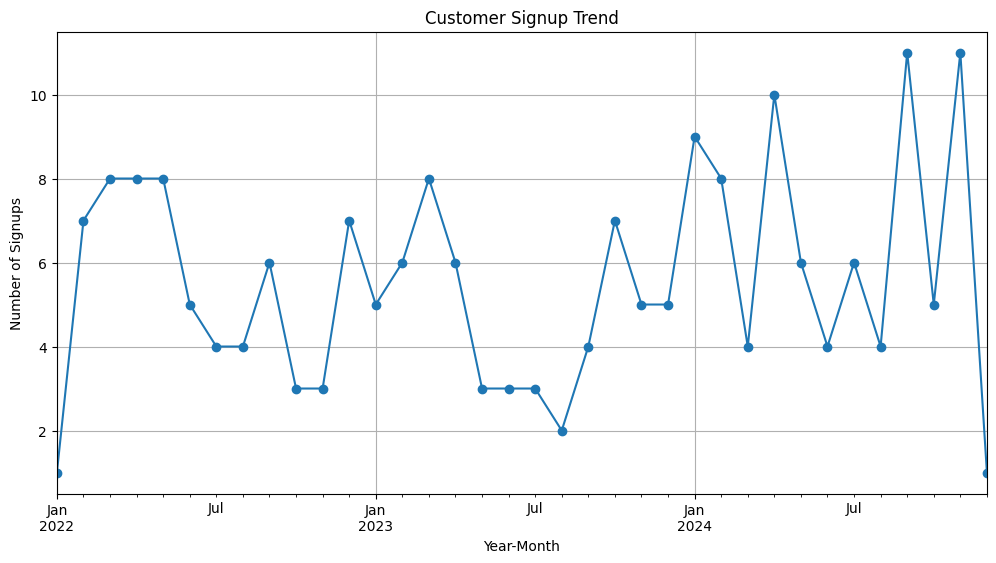

In [47]:
# Convert 'SignupDate' to datetime objects
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract the year and month of signup
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Count the number of signups per month
signup_trend = customers.groupby('SignupYearMonth')['CustomerID'].count()

# Plot the results
plt.figure(figsize=(12, 6))
signup_trend.plot(kind='line', marker='o')
plt.title('Customer Signup Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

In [48]:
# Convert 'SignupDate' to datetime objects
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract the year and month of signup
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Count the number of signups per month
signup_trend = customers.groupby('SignupYearMonth')['CustomerID'].count().reset_index()

# Convert PeriodIndex to string for easier handling
signup_trend['SignupYearMonth'] = signup_trend['SignupYearMonth'].astype(str)

# Group by customer count and create a list of YearMonths for each count
grouped_signup_trend = signup_trend.groupby('CustomerID')['SignupYearMonth'].agg(list).reset_index()

# Rename columns for clarity
grouped_signup_trend.columns = ['SignupCount', 'YearMonths']

# Sort by SignupCount in descending order
grouped_signup_trend = grouped_signup_trend.sort_values('SignupCount', ascending=False)

# Display the grouped and sorted signup trend without the left index
grouped_signup_trend.reset_index(drop=True, inplace=True)

grouped_signup_trend

,SignupCount,YearMonths
0,11,"[2024-09, 2024-11]"
1,10,[2024-04]
2,9,[2024-01]
3,8,"[2022-03, 2022-04, 2022-05, 2023-03, 2024-02]"
4,7,"[2022-02, 2022-12, 2023-10]"
5,6,"[2022-09, 2023-02, 2023-04, 2024-05, 2024-07]"
6,5,"[2022-06, 2023-01, 2023-11, 2023-12, 2024-10]"
7,4,"[2022-07, 2022-08, 2023-09, 2024-03, 2024-06, ..."
8,3,"[2022-10, 2022-11, 2023-05, 2023-06, 2023-07]"
9,2,[2023-08]


### Most valuable customers

In [49]:
# Merge customers and transactions
merged_data = pd.merge(customers, transactions, on='CustomerID')

In [50]:
# --- Total Spending ---
top_spenders = merged_data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().reset_index()
top_spenders = top_spenders.sort_values('TotalValue', ascending=False)

print("Top 10 Spenders:")
top_spenders.head(10)

Top 10 Spenders:


,CustomerID,CustomerName,TotalValue
140,C0141,Paul Parsons,10673.87
53,C0054,Bruce Rhodes,8040.39
64,C0065,Gerald Hines,7663.70
155,C0156,William Adams,7634.45
81,C0082,Aimee Taylor,7572.91
186,C0188,Anna Ball,7111.32
58,C0059,Mrs. Kimberly Wright,7073.28
27,C0028,Jennifer Pena,6819.57
98,C0099,Rodney Eaton,6715.72
164,C0165,Juan Mcdaniel,6708.10


In [51]:
# --- Purchase Frequency ---
purchase_frequency = merged_data.groupby(['CustomerID', 'CustomerName'])['TransactionID'].count().reset_index()
purchase_frequency.rename(columns={'TransactionID': 'PurchaseCount'}, inplace=True)
purchase_frequency = purchase_frequency.sort_values('PurchaseCount', ascending=False)

print("\nTop 10 Customers by Purchase Frequency:")
purchase_frequency.head(10)


Top 10 Customers by Purchase Frequency:


,CustomerID,CustomerName,PurchaseCount
108,C0109,Abigail Jones,11
155,C0156,William Adams,11
7,C0008,David Li,10
174,C0175,Matthew Johnson,10
140,C0141,Paul Parsons,10
64,C0065,Gerald Hines,10
164,C0165,Juan Mcdaniel,9
83,C0084,Belinda Garner,9
92,C0093,Nancy Walker,9
74,C0075,Misty Higgins,9


In [52]:
# --- Average Order Value ---
average_order_value = merged_data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].mean().reset_index()
average_order_value.rename(columns={'TotalValue': 'AverageOrderValue'}, inplace=True)
average_order_value = average_order_value.sort_values('AverageOrderValue', ascending=False)

print("\nTop 10 Customers by Average Order Value:")
average_order_value.head(10)


Top 10 Customers by Average Order Value:


,CustomerID,CustomerName,AverageOrderValue
39,C0040,Michael Harrell,1323.133333
88,C0089,Paul Carter,1278.110000
65,C0066,Catherine White,1266.426667
167,C0168,Karen Clements MD,1263.457500
194,C0196,Laura Watts,1245.720000
95,C0096,Benjamin Mcclure,1214.584000
113,C0114,Benjamin Anderson,1156.086000
183,C0185,Kathleen Logan,1141.440000
137,C0138,Cynthia Clayton,1122.050000
147,C0148,Matthew Rogers,1091.558000


In [53]:
# --- Recency (Days since last purchase) ---
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
last_purchase = transactions.groupby('CustomerID')['TransactionDate'].max()
recency = (transactions['TransactionDate'].max() - last_purchase).dt.days.reset_index()
recency.columns = ['CustomerID', 'Recency']

temp_customers = pd.read_csv("data/Customers.csv")
temp_customers = pd.merge(temp_customers, recency, on="CustomerID", how='left')

temp_customers[['CustomerID', 'CustomerName', 'Recency']].sort_values(by='Recency').head(10)

,CustomerID,CustomerName,Recency
100,C0101,Kelsey Roberts,0.0
180,C0181,Alexander Barker,0.0
196,C0197,Christina Harvey,0.0
118,C0119,David Armstrong,1.0
187,C0188,Anna Ball,1.0
55,C0056,Erika Fernandez,2.0
10,C0011,Bryan Mathews,2.0
28,C0029,Erin Manning,2.0
164,C0165,Juan Mcdaniel,2.0
85,C0086,Stephanie Peterson,2.0


In [54]:
# --- Visualize the combined metrics ---
# Merge spending, frequency, and recency data
customer_value = pd.merge(top_spenders, purchase_frequency, on=['CustomerID', 'CustomerName'])
customer_value = pd.merge(customer_value, average_order_value, on=['CustomerID', 'CustomerName'])
customer_value = pd.merge(customer_value, recency, on='CustomerID')

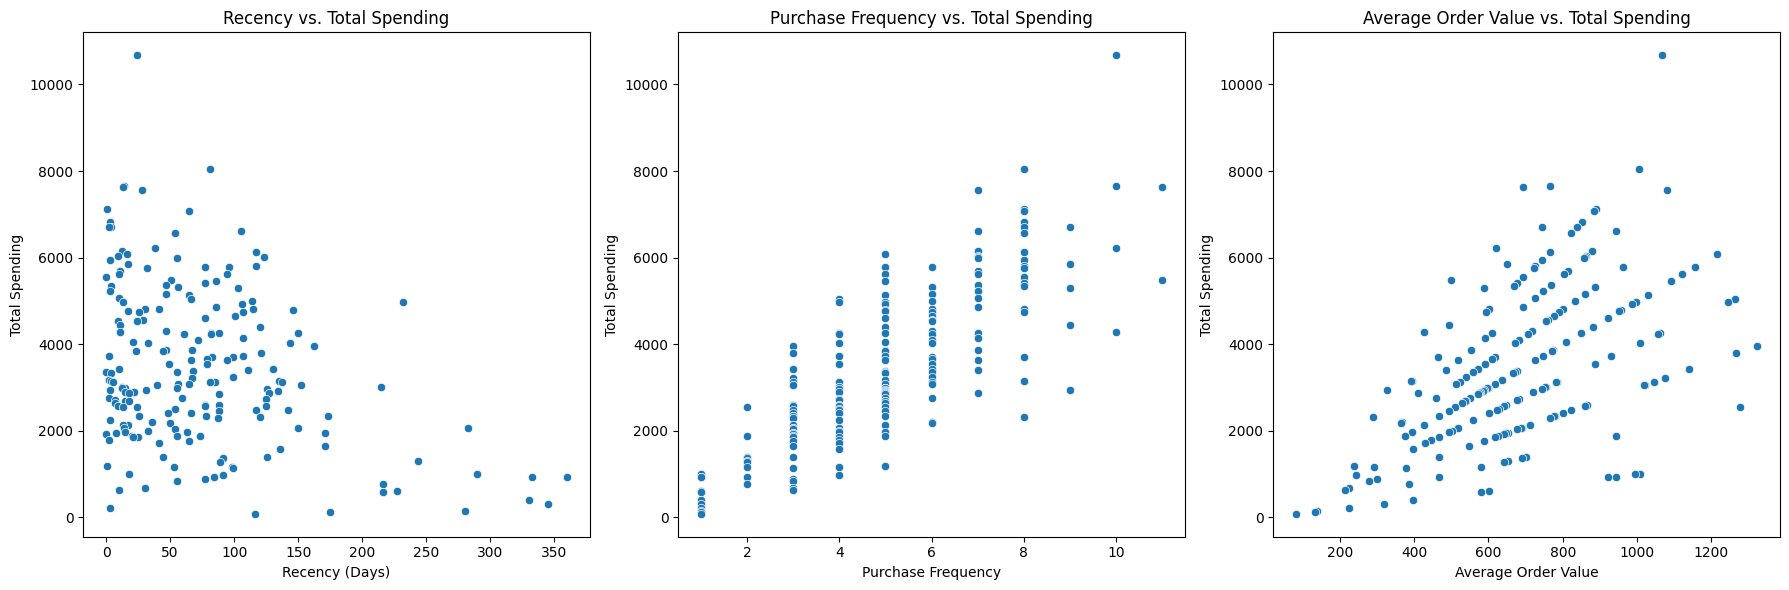

In [55]:
# Visualize the combined metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='Recency', y='TotalValue', data=customer_value, ax=axes[0])
axes[0].set_title('Recency vs. Total Spending')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Total Spending')

sns.scatterplot(x='PurchaseCount', y='TotalValue', data=customer_value, ax=axes[1])
axes[1].set_title('Purchase Frequency vs. Total Spending')
axes[1].set_xlabel('Purchase Frequency')
axes[1].set_ylabel('Total Spending')

sns.scatterplot(x='AverageOrderValue', y='TotalValue', data=customer_value, ax=axes[2])
axes[2].set_title('Average Order Value vs. Total Spending')
axes[2].set_xlabel('Average Order Value')
axes[2].set_ylabel('Total Spending')

plt.tight_layout()
plt.show()

### Customer Segmentation based on Purchaing behavior

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# --- Recency ---
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
last_purchase = transactions.groupby('CustomerID')['TransactionDate'].max()
recency = (transactions['TransactionDate'].max() - last_purchase).dt.days.reset_index()
recency.columns = ['CustomerID', 'Recency']
customers_data = pd.merge(customers, recency, on='CustomerID', how='left')

# --- Frequency ---
frequency = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
customers_data = pd.merge(customers_data, frequency, on='CustomerID', how='left')

# --- Monetary Value ---
monetary = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
customers_data = pd.merge(customers_data, monetary, on='CustomerID', how='left')

# --- Product Categories Purchased ---
# Create binary columns indicating whether a customer has purchased from each product category
transactions = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID')
category_purchases = pd.crosstab(transactions['CustomerID'], transactions['Category']).add_prefix('Category_')
customers_data = pd.merge(customers_data, category_purchases, on='CustomerID', how='left')

In [57]:
# Select features for clustering
features_for_clustering = ['Recency', 'Frequency', 'Monetary'] + list(category_purchases.columns)

# Fill NA with 0 for category columns before clustering.
customers_data[features_for_clustering] = customers_data[features_for_clustering].fillna(0)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers_data[features_for_clustering])

# Determine optimal k using the Elbow Method and DB Index
inertia = []
db_scores = []
for i in range(2, 22):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(scaled_features, kmeans.labels_))

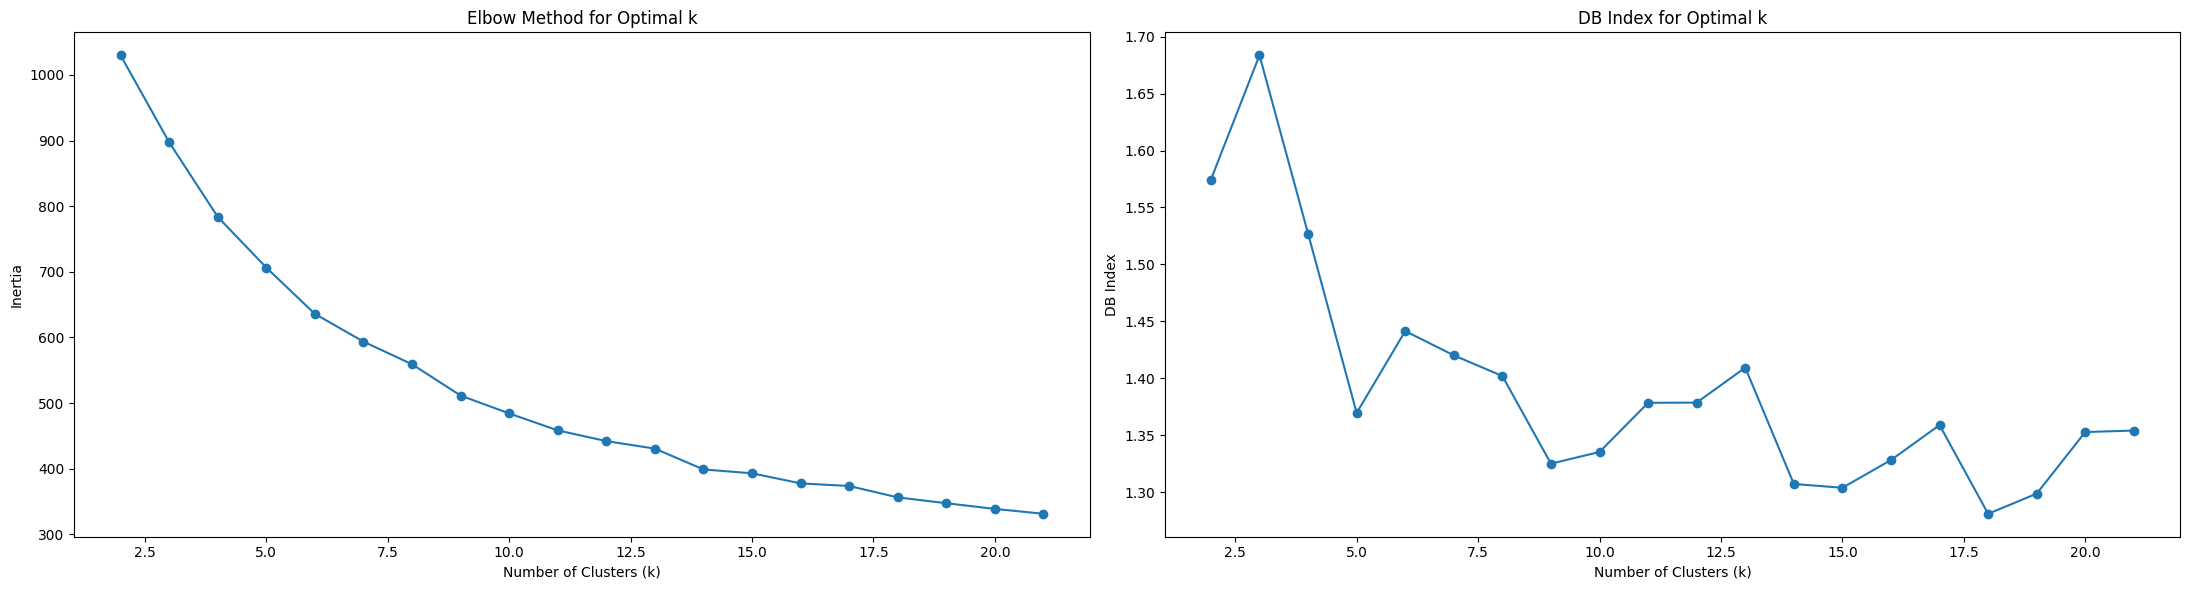

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

# Plotting the Elbow Method
axes[0].plot(range(2, 22), inertia, marker='o')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')

# Plotting the DB Index scores
axes[1].plot(range(2, 22), db_scores, marker='o')
axes[1].set_title('DB Index for Optimal k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('DB Index')

plt.tight_layout()
plt.show()

In [59]:
# Perform K-Means clustering with the chosen number of clusters
chosen_k = 6  #  based on the elbow method and DB Index
kmeans = KMeans(n_clusters=chosen_k, random_state=0, n_init=10)
customers_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate the DB Index for the chosen k
db_index = davies_bouldin_score(scaled_features, customers_data['Cluster'])
print(f"Davies-Bouldin Index for k={chosen_k}: {db_index}")

Davies-Bouldin Index for k=6: 1.4414305753630288


In [60]:
# Analyze the characteristics of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)
print("Cluster Centers:")
cluster_centers

Cluster Centers:


,Recency,Frequency,Monetary,Category_Books,Category_Clothing,Category_Electronics,Category_Home Decor
0,48.080000,6.360000,4293.222800,3.240000,0.760000,1.600000,0.760000
1,60.084746,3.389831,2169.505593,0.864407,1.186441,0.440678,0.898305
2,262.692308,1.307692,712.300000,0.153846,0.307692,0.153846,0.692308
3,75.000000,4.538462,3301.399231,0.769231,0.743590,2.307692,0.717949
4,46.304348,8.217391,5916.015652,1.913043,3.130435,2.086957,1.086957
5,62.243902,6.292683,4404.422683,1.512195,0.829268,1.170732,2.780488


In [61]:
# Add the cluster labels to the original customers dataframe
customers['Cluster'] = customers_data['Cluster']

# Example: Explore the distribution of features within each cluster
print("Cluster Profiles:")
customers_data.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'CustomerID': 'count'
})

Cluster Profiles:


Recency        Frequency            Monetary          CustomerID
               mean median      mean median         mean   median      count
Cluster                                                                     
0         48.080000   26.0  6.360000    6.0  4293.222800  4533.32         25
1         60.084746   54.0  3.389831    3.0  2169.505593  2239.04         59
2        262.692308  280.0  1.307692    1.0   712.300000   601.36         13
3         75.000000   66.0  4.538462    5.0  3301.399231  3137.18         39
4         46.304348   32.0  8.217391    8.0  5916.015652  6000.56         23
5         62.243902   59.0  6.292683    6.0  4404.422683  4271.61         41

## Product Insights

### Most Popular Products

In [62]:
# --- By Sales Volume (Quantity) ---
top_products_volume = transactions.groupby(['ProductID', 'Category'])['Quantity'].sum().reset_index()
top_products_volume = top_products_volume.sort_values('Quantity', ascending=False).head(10)

print("Top 10 Products by Sales Volume:")
top_products_volume

Top 10 Products by Sales Volume:


,ProductID,Category,Quantity
53,P054,Books,46
58,P059,Clothing,46
28,P029,Electronics,45
47,P048,Books,43
56,P057,Electronics,43
60,P061,Home Decor,43
78,P079,Home Decor,43
61,P062,Books,39
19,P020,Clothing,38
27,P028,Home Decor,38


In [63]:
# --- By Revenue ---
top_products_revenue = transactions.groupby(['ProductID', 'Category'])['TotalValue'].sum().reset_index()
top_products_revenue = top_products_revenue.sort_values('TotalValue', ascending=False).head(10)

print("\nTop 10 Products by Revenue:")
top_products_revenue


Top 10 Products by Revenue:


,ProductID,Category,TotalValue
28,P029,Electronics,19513.80
78,P079,Home Decor,17946.91
47,P048,Books,17905.20
19,P020,Clothing,15060.92
61,P062,Books,14592.24
58,P059,Clothing,13947.20
38,P039,Electronics,13778.88
82,P083,Electronics,13671.60
18,P019,Clothing,13487.95
40,P041,Electronics,13232.12


C:\Users\GURDARSH VIRK\AppData\Local\Temp\ipykernel_21796\3195790169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductName', data=top_products_volume, palette='viridis', ax=axes[0])
C:\Users\GURDARSH VIRK\AppData\Local\Temp\ipykernel_21796\3195790169.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='ProductName', data=top_products_revenue, palette='viridis', ax=axes[1])


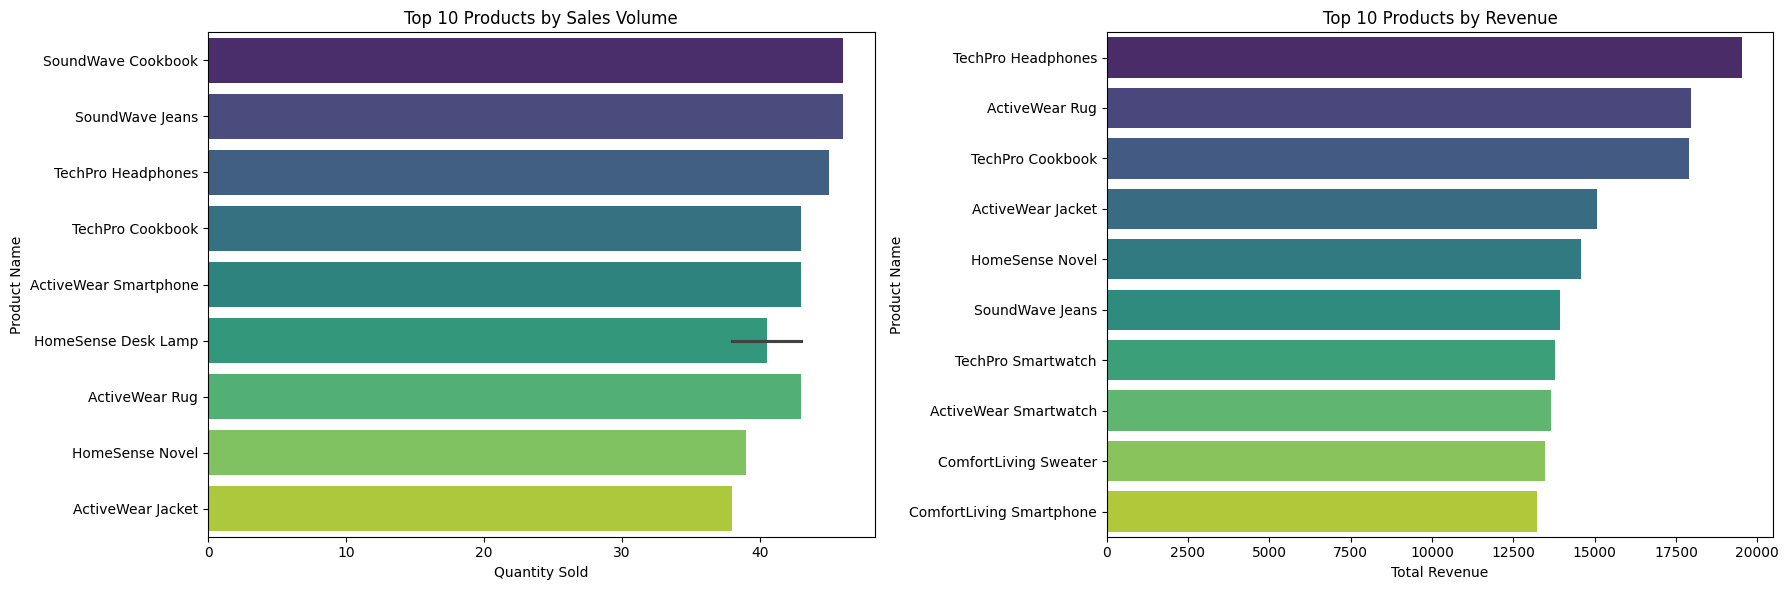

In [64]:
# Merge with products to get product names
top_products_volume = pd.merge(top_products_volume, products, on='ProductID')
top_products_revenue = pd.merge(top_products_revenue, products, on='ProductID')

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Quantity', y='ProductName', data=top_products_volume, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Products by Sales Volume')
axes[0].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Product Name')

sns.barplot(x='TotalValue', y='ProductName', data=top_products_revenue, palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Products by Revenue')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Product Name')

plt.tight_layout()
plt.show()


### Best performing product categories

In [65]:
# --- By Sales Volume (Quantity) ---
top_categories_volume = transactions.groupby('Category')['Quantity'].sum().reset_index()
top_categories_volume = top_categories_volume.sort_values('Quantity', ascending=False)

print("Top Categories by Sales Volume:\n")
top_categories_volume

Top Categories by Sales Volume:



,Category,Quantity
0,Books,681
3,Home Decor,639
2,Electronics,627
1,Clothing,590


In [66]:
# --- By Revenue ---
top_categories_revenue = transactions.groupby('Category')['TotalValue'].sum().reset_index()
top_categories_revenue = top_categories_revenue.sort_values('TotalValue', ascending=False)

print("Top Categories by Revenue:")
top_categories_revenue

Top Categories by Revenue:


,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


C:\Users\GURDARSH VIRK\AppData\Local\Temp\ipykernel_21796\2053682245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Category', data=top_categories_volume, palette='viridis', ax=axes[0])
C:\Users\GURDARSH VIRK\AppData\Local\Temp\ipykernel_21796\2053682245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Category', data=top_categories_revenue, palette='viridis', ax=axes[1])


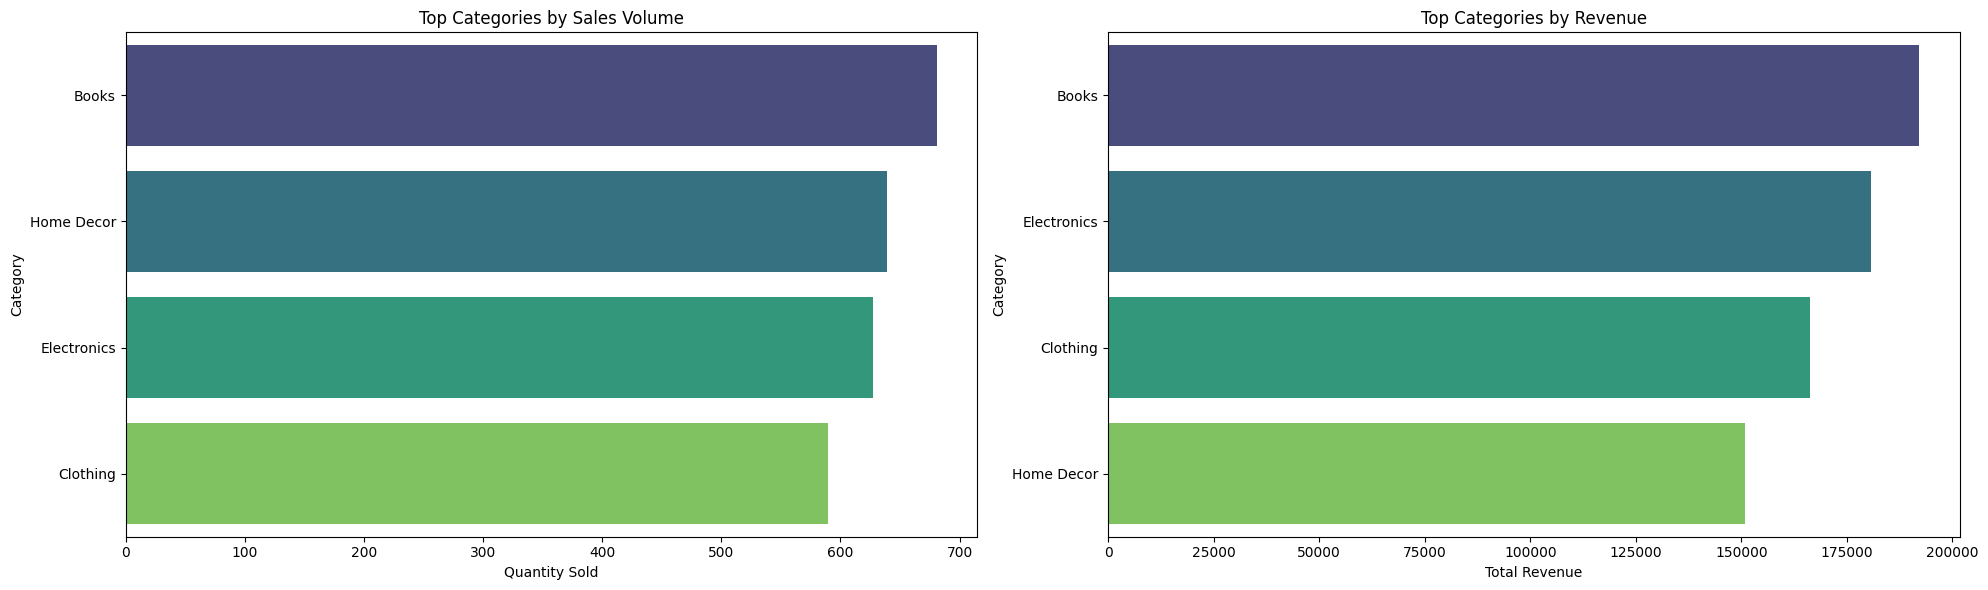

In [67]:
# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x='Quantity', y='Category', data=top_categories_volume, palette='viridis', ax=axes[0])
axes[0].set_title('Top Categories by Sales Volume')
axes[0].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Category')

sns.barplot(x='TotalValue', y='Category', data=top_categories_revenue, palette='viridis', ax=axes[1])
axes[1].set_title('Top Categories by Revenue')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Category')

plt.tight_layout()
plt.show()


### Frequently purchased product bundles

In [70]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Create a transaction list for the Apriori algorithm
transactions_list = transactions.groupby('TransactionID')['ProductID'].apply(list).tolist()

# Convert the transaction list to a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)  # Adjust min_support as needed

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)  # Adjust min_threshold as needed

# Sort rules by lift (descending)
rules = rules.sort_values('lift', ascending=False)

In [71]:
# Add product names for better readability
rules = pd.merge(rules, products[['ProductID', 'ProductName']], how='left', left_on='antecedents', right_on='ProductID')
rules.rename(columns={'ProductName': 'Antecedent_Name'}, inplace=True)
rules = pd.merge(rules, products[['ProductID', 'ProductName']], how='left', left_on='consequents', right_on='ProductID')
rules.rename(columns={'ProductName': 'Consequent_Name'}, inplace=True)
rules.drop(['ProductID_x', 'ProductID_y'], axis=1, inplace=True)
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0])
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0])

print("Association Rules (Product Bundles):\n", rules)

Association Rules (Product Bundles):
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski, Antecedent_Name, Consequent_Name]
Index: []


## Sales Insights

### Overall sales trend

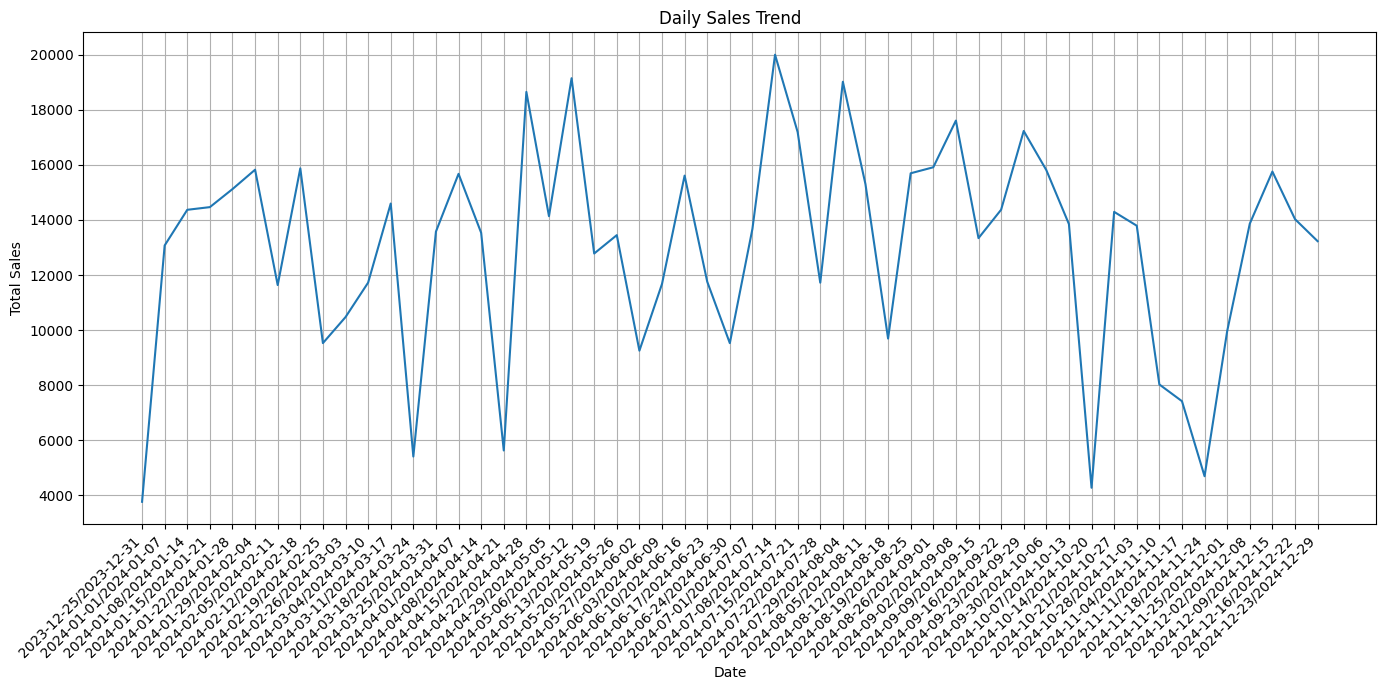

In [76]:
# Ensure TransactionDate is a datetime object
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate sales by date (you can change to weekly, monthly, etc.)
weekly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('W'))['TotalValue'].sum().reset_index()
weekly_sales.columns = ['Date', 'TotalSales']

# Convert Period to string for plotting
weekly_sales['Date'] = weekly_sales['Date'].astype(str)

# Plot the sales trend
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Date'], weekly_sales['TotalSales'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
weekly_sales.sort_values('TotalSales', ascending=False).head(10)

,Date,TotalSales
28,2024-07-08/2024-07-14,19997.16
19,2024-05-06/2024-05-12,19143.37
31,2024-07-29/2024-08-04,19014.15
17,2024-04-22/2024-04-28,18646.65
36,2024-09-02/2024-09-08,17605.74
39,2024-09-23/2024-09-29,17228.50
29,2024-07-15/2024-07-21,17188.89
35,2024-08-26/2024-09-01,15910.97
7,2024-02-12/2024-02-18,15871.74
5,2024-01-29/2024-02-04,15822.61


### Seasonal sales trend

In [79]:
# Extract month and day of the week for seasonality analysis
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek

# Aggregate sales by month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Aggregate sales by day of the week
weekday_sales = transactions.groupby('DayOfWeek')['TotalValue'].sum()

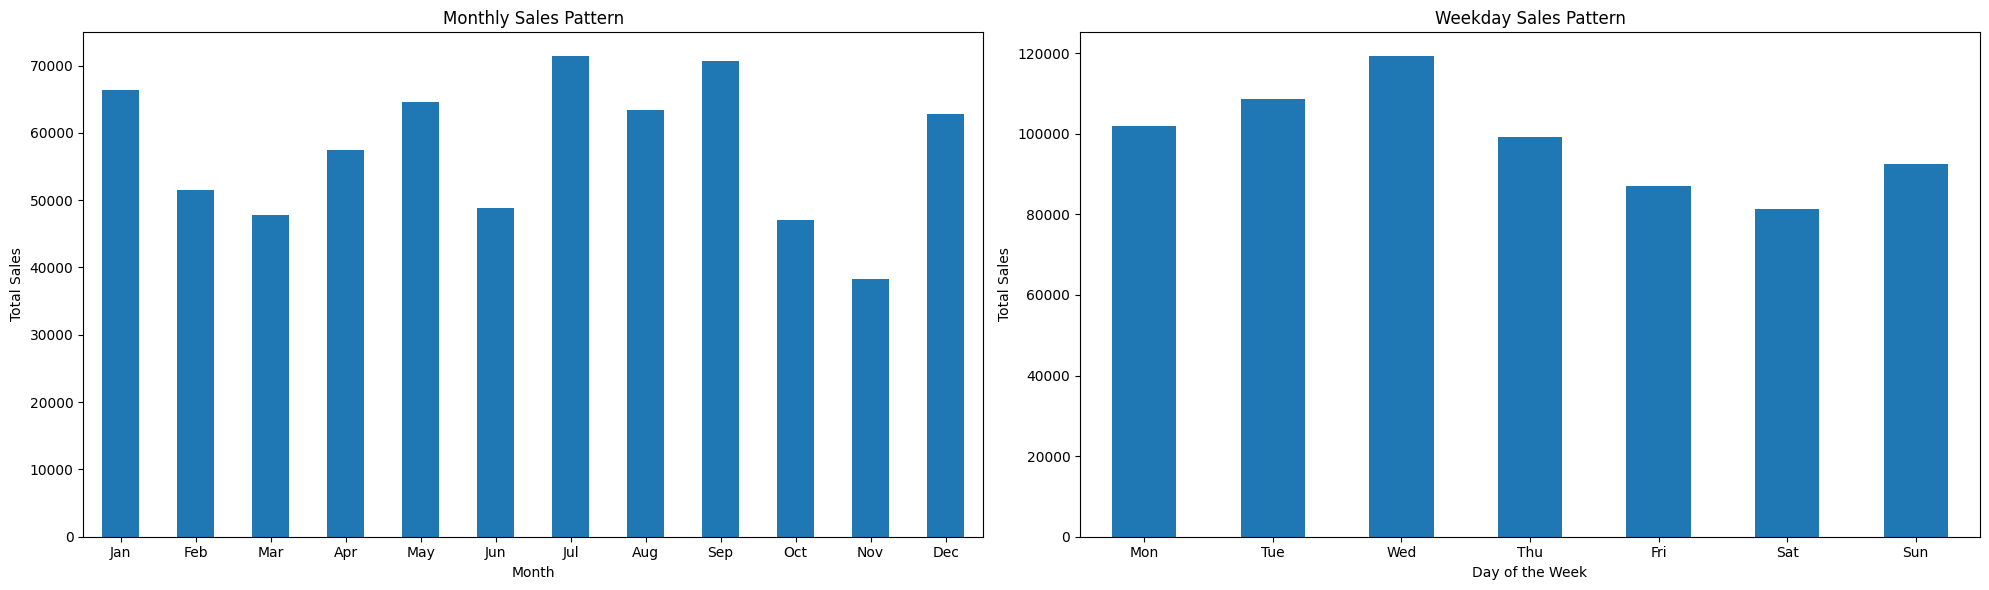

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot monthly sales
monthly_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Monthly Sales Pattern')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Plot weekday sales (0 = Monday, 6 = Sunday)
weekday_sales.plot(kind='bar', ax=axes[1])
axes[1].set_title('Weekday Sales Pattern')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Sales')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.tight_layout()
plt.show()


### Most profitable regions

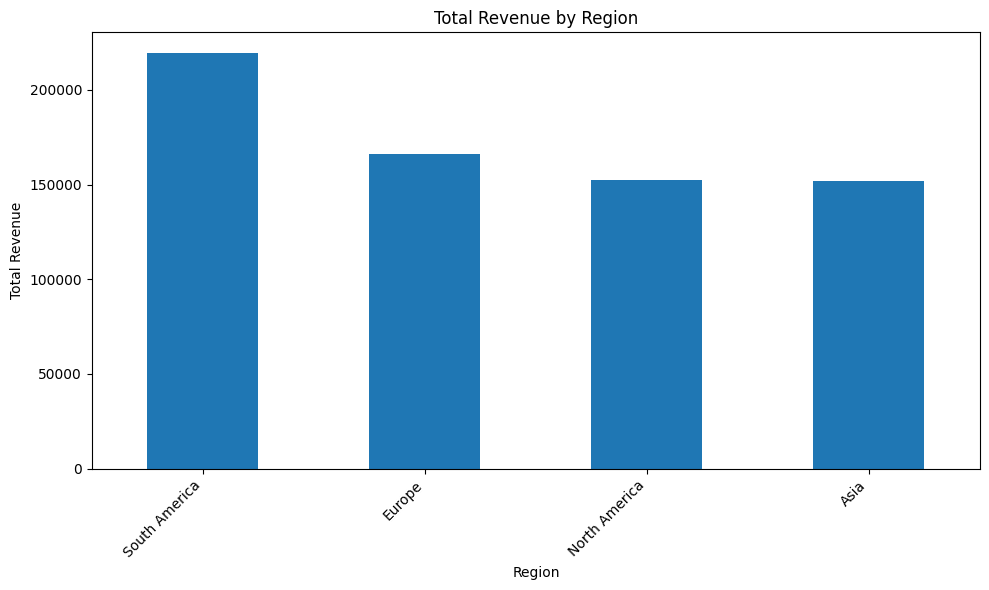

In [82]:
# Merge transactions and customers to get region information
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Aggregate total sales by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
region_revenue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

### Average order value

In [85]:
# Calculate the average order value
average_order_value = transactions['TotalValue'].mean()

print(f"Average Order Value: {average_order_value:.2f}")

Average Order Value: 690.00


### Time distribution of orders

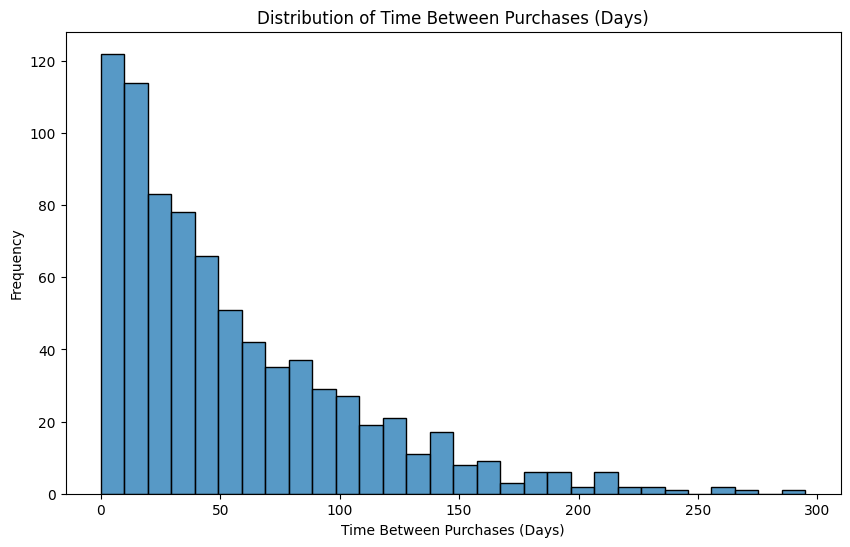

In [86]:
# Sort transactions by customer and date
transactions.sort_values(['CustomerID', 'TransactionDate'], inplace=True)

# Calculate the time difference between consecutive purchases for each customer
transactions['TimeDiff'] = transactions.groupby('CustomerID')['TransactionDate'].diff()

# Convert timedelta to days (for easier interpretation)
transactions['TimeDiffDays'] = transactions['TimeDiff'].dt.days

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TimeDiffDays'].dropna(), bins=30, kde=False)  # Drop NA values (first purchases)
plt.title('Distribution of Time Between Purchases (Days)')
plt.xlabel('Time Between Purchases (Days)')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Descriptive statistics
transactions['TimeDiffDays'].describe()

count    801.000000
mean      55.377029
std       51.014975
min        0.000000
25%       16.000000
50%       40.000000
75%       81.000000
max      295.000000
Name: TimeDiffDays, dtype: float64